```{contents}

```


# Hypothesis Testing with Z-test

---

## Background

The **Z-test** is used to check whether a sample mean significantly differs from the population mean when:

1. The **population standard deviation (σ) is known**
2. The **sample size (n ≥ 30)**

Types:

* **Two-tailed Z-test** → checks if the sample mean is **different** (≠)
* **One-tailed Z-test** → checks if the sample mean is **greater** (>) or **less** (<)

---

Great question 👍 Let’s break it down clearly.

---

## Steps in performing a **Z-test**

1. **State the hypotheses**

   * **Null hypothesis (H₀):** No difference / effect (e.g., μ = μ₀).
   * **Alternative hypothesis (H₁):** Difference / effect exists (depends if one-tailed or two-tailed).

2. **Choose significance level (α)**

   * Common: 0.05 (5%) or 0.01 (1%).
   * Determines rejection region.

3. **Decide if the test is one-tailed or two-tailed**

   * Based on the **research question** (see below).

4. **Calculate the test statistic (Z)**
   Formula:

   $$
   Z = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}}
   $$

   where:

   * $\bar{X}$ = sample mean
   * $\mu_0$ = population mean under H₀
   * $\sigma$ = population standard deviation (or estimated from sample if large n)
   * $n$ = sample size

5. **Find the critical value(s)**

   * Use **Z-tables** or normal distribution:

     * For **two-tailed test, α = 0.05 → critical values = ±1.96**
     * For **one-tailed test, α = 0.05 → critical value = 1.645 (right) or -1.645 (left)**

6. **Make the decision**

   * Compare **observed Z** with **critical Z**:

     * If in rejection region → **Reject H₀**
     * Otherwise → **Fail to reject H₀**

---

## ✅ How to decide **One-tailed vs Two-tailed**

1. **One-tailed Z-test**

   * Used when your alternative hypothesis predicts a **directional effect**.
   * Example:

     * H₀: μ = 50
     * H₁: μ > 50 (**right-tailed**)
     * H₁: μ < 50 (**left-tailed**)

   👉 You only care if the mean is **greater than** or **less than** the hypothesized value.

2. **Two-tailed Z-test**

   * Used when you only test for a **difference**, not direction.
   * Example:

     * H₀: μ = 50
     * H₁: μ ≠ 50
       👉 You care whether the mean is **different in either direction**.

---

⚡ Rule of thumb:

* If the research question asks **“greater than” or “less than”** → **One-tailed**.
* If it asks **“different from”** or **“not equal”** → **Two-tailed**.


## Problem 1: Two-tailed Z-test

**Problem Statement:**
A researcher claims that the average height of adult men is **168 cm** with a population standard deviation of **3.9 cm**. A random sample of **36 men** had a mean height of **169.5 cm**. At a **95% confidence level (α = 0.05)**, test whether the average height differs from 168 cm.

**Step 1 – Hypotheses**

* H₀: μ = 168
* H₁: μ ≠ 168

**Step 2 – Test Statistic**

$$
Z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}} 
= \frac{169.5 - 168}{3.9 / \sqrt{36}} 
= \frac{1.5}{0.65} \approx 2.31
$$

**Step 3 – Decision Rule**

* At α = 0.05 (two-tailed) → critical Z = ±1.96
* Since |2.31| > 1.96 → Reject H₀

**Conclusion:** The sample provides evidence that the average height is **significantly different** from 168 cm.

---

## Problem 2: One-tailed Z-test

**Problem Statement:**
A company claims that its light bulbs last an average of **5 years** with a population standard deviation of **0.50 years**. A sample of **40 bulbs** had an average life of **4.8 years**. At a **98% confidence level (α = 0.02)**, test whether the bulbs last **less than 5 years**.

**Step 1 – Hypotheses**

* H₀: μ = 5
* H₁: μ < 5

**Step 2 – Test Statistic**

$$
Z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}} 
= \frac{4.8 - 5}{0.5 / \sqrt{40}} 
= \frac{-0.2}{0.079} \approx -2.53
$$

**Step 3 – Decision Rule**

* At α = 0.02 (one-tailed left) → critical Z = -2.05
* Since -2.53 < -2.05 → Reject H₀

**Conclusion:** The bulbs’ average life is **significantly less than 5 years**, supporting the claim of malfunctioning earlier.

---

## Key Differences

* **Two-tailed test** looks for deviation in **both directions** (≠).
* **One-tailed test** checks deviation in **one specific direction** (< or >).
* **Decision rules** rely on critical Z values or p-values.


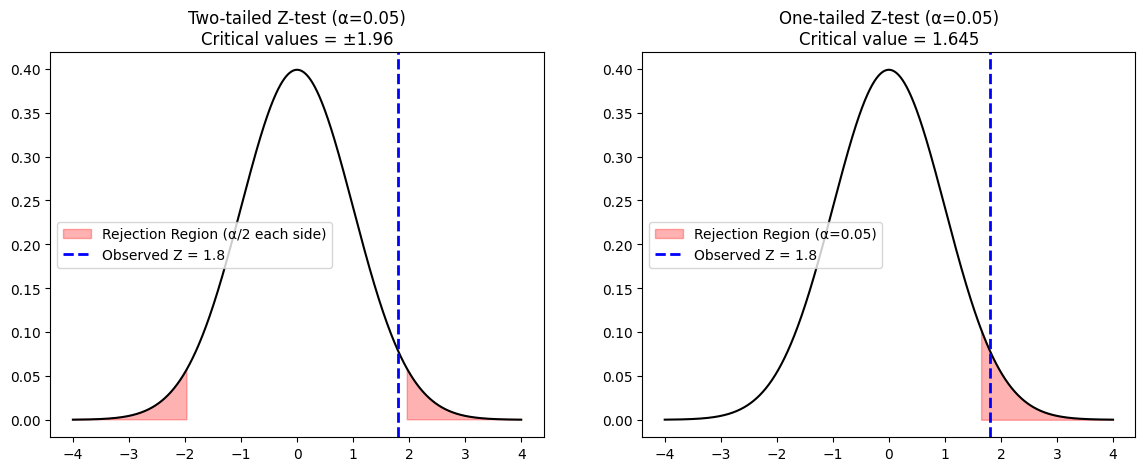

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Values
alpha = 0.05
z_two_tailed = norm.ppf(1 - alpha/2)   # 1.96
z_one_tailed = norm.ppf(1 - alpha)     # 1.645
z_obs = 1.8  # Example observed Z

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Two-tailed test ---
axes[0].plot(x, y, 'k')
axes[0].fill_between(x, y, where=(x <= -z_two_tailed) | (x >= z_two_tailed), 
                     color="red", alpha=0.3, label="Rejection Region (α/2 each side)")
axes[0].axvline(z_obs, color="blue", linestyle="--", linewidth=2, label=f"Observed Z = {z_obs}")
axes[0].set_title("Two-tailed Z-test (α=0.05)\nCritical values = ±1.96")
axes[0].legend()

# --- One-tailed test ---
axes[1].plot(x, y, 'k')
axes[1].fill_between(x, y, where=(x >= z_one_tailed), 
                     color="red", alpha=0.3, label="Rejection Region (α=0.05)")
axes[1].axvline(z_obs, color="blue", linestyle="--", linewidth=2, label=f"Observed Z = {z_obs}")
axes[1].set_title("One-tailed Z-test (α=0.05)\nCritical value = 1.645")
axes[1].legend()

plt.show()
